In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import getpass
%matplotlib inline

In [3]:
username = getpass.getuser()

In [245]:
data = pd.read_csv('/Users/{:}/Dropbox (HMS)/mouse_bandit/markov_full.csv'.format(username), index_col=0)

### make some new dataframes
    X has predictor variables (choice and reward history for past n trials) relevant variables for logit model
    Y has dependent variable (choice on current trial)

### set up which datasets will be predictor and target

In [226]:
# set up as X and Y for logistic regression (X contains all predictors)
X_switch = np.column_stack((switch_history, reward_history[:,0:9])) # n-1 to n-10 trial switches and outcomes
X_choice_switch = np.column_stack((switch_history, choice_history[:,0:9], reward_history[:,0:9]))
X_choice = np.column_stack((choice_history, reward_history)) # n-1 to n-10 trial switches and outcomes

Y_switch = switch.ravel() # current trial switches

### subset data into left->right and right->left switches

In [244]:

# create list of indices where animal switched to either left or right side on x trial
idx_right_choice = np.sort(list(set(np.where(choice_history[:,9]==1)[0]) & set(np.where(Y_switch==1)[0])))
idx_left_choice = np.sort(list(set(np.where(choice_history[:,9]==0)[0]) & set(np.where(Y_switch==1)[0])))

Y_switch_right = np.zeros(Y_switch.shape[0])
Y_switch_right[idx_right_choice]=1

Y_switch_left = np.zeros(Y_switch.shape[0])
Y_switch_left[idx_left_choice]=1


TypeError: unhashable type: 'slice'

### split data into training and testing datasets
--right now 70% to train, 30% test

--X (train and test) mxn matrix with m trials and [n/2 choice, n/2 corresponding reward outcomes]
            
            X[:,0:9] = choice_history
            
            X[:,10:19] = reward_history

--Y (train and test) mx1 matrix with m trials and 1 choice outcome


### Logistic regression
Compare training on port choice (lr_port) vs training on switch (lr_switch)

### lr1 - train on port choice to predict port choice

In [186]:
'''LEFT'''
X_train, X_test, y_train, y_test = train_test_split(X_choice, Y_switch_left, test_size=0.3, random_state=1)

lr1_choice = LogisticRegression()
lr1_choice.fit(X_train, y_train)

lr1_choice_proba_L = lr1_choice.predict_proba(X_test)
lr1_choice_predict_L = lr1_choice.predict(X_test)

score_lr1_choice_L = lr1_choice.score(X_test, y_test)
metrics_lr1_choice_L = sklearn.metrics.precision_recall_fscore_support(y_test, lr1_choice_predict_L)

'''RIGHT'''

X_train, X_test, y_train, y_test = train_test_split(X_choice, Y_switch_right, test_size=0.3, random_state=1)

lr1_choice = LogisticRegression()
lr1_choice.fit(X_train, y_train)

lr1_choice_proba_R = lr1_choice.predict_proba(X_test)
lr1_choice_predict_R = lr1_choice.predict(X_test)

score_lr1_choice_R = lr1_choice.score(X_test, y_test)
metrics_lr1_choice_R = sklearn.metrics.precision_recall_fscore_support(y_test, lr1_choice_predict_R)


'''INTEGRATED'''

'INTEGRATED'

In [187]:
metrics_lr1_choice_L

(array([ 0.96642511,  0.4420191 ]),
 array([ 0.9956748 ,  0.09012517]),
 array([ 0.98083194,  0.14972274]),
 array([94562,  3595]))

In [188]:
metrics_lr1_choice_R

(array([ 0.96655402,  0.37278107]),
 array([ 0.9966421 ,  0.05470333]),
 array([ 0.98136749,  0.09540636]),
 array([94702,  3455]))

In [189]:
np.sum(lr1_choice_predict_L)

733.0

In [190]:
np.sum(lr1_choice_predict_R)

507.0

### lr2 - train on switches to predict switches

In [191]:
'''LEFT'''
X_train, X_test, y_train, y_test = train_test_split(X_switch, Y_switch_left, test_size=0.3, random_state=1)

lr2_switch = LogisticRegression()
lr2_switch.fit(X_train, Y_train_switch_left)

lr2_switch_proba_L = lr2_switch.predict_proba(X_test)
lr2_switch_predict_L = lr2_switch.predict(X_test)

score_lr2_switch_L = lr2_switch.score(X_test, Y_test_switch_left)
metrics_lr2_switch_L = sklearn.metrics.precision_recall_fscore_support(Y_test_switch_left, lr2_switch_predict_L)

'''RIGHT'''
X_train, X_test, y_train, y_test = train_test_split(X_switch, Y_switch_right, test_size=0.3, random_state=1)

lr2_switch = LogisticRegression()
lr2_switch.fit(X_train, y_train)

lr2_switch_proba_R = lr2_switch.predict_proba(X_test)
lr2_switch_predict_R = lr2_switch.predict(X_test)

score_lr2_switch_R = lr2_switch.score(X_test, y_test)
metrics_lr2_switch_R = sklearn.metrics.precision_recall_fscore_support(y_test, lr2_switch_predict_R)


/Users/celiaberon/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [192]:
metrics_lr2_switch_L

(array([ 0.96344632,  0.        ]),
 array([ 1.,  0.]),
 array([ 0.9813829,  0.       ]),
 array([94569,  3588]))

In [193]:
metrics_lr2_switch_R

(array([ 0.96480129,  0.        ]),
 array([ 1.,  0.]),
 array([ 0.98208536,  0.        ]),
 array([94702,  3455]))

### restructure dataset to reflect action value instead of raw actions

In [173]:
# value = L when choice = 0 and reward = 1 or when choice = 1 and reward = 0 
# value = R when choice = 1 and reward = 1 or when choice = 0 and reward = 0
X_value_history = (choice_history==reward_history).astype('int') # gives action value with R=1, L=0

### lr3 - use action value to predict choice

In [194]:
'''LEFT'''
X_train, X_test, y_train, y_test = train_test_split(X_value_history, Y_switch_left, test_size=0.3, random_state=1)

lr3_value = LogisticRegression()
lr3_value.fit(X_train, y_train)

lr3_value_proba_L = lr3_value.predict_proba(X_test)
lr3_value_predict_L = lr3_value.predict(X_test)

score_lr3_value_L = lr3_value.score(X_test, y_test)
metrics_lr3_value_L = sklearn.metrics.precision_recall_fscore_support(y_test, lr3_value_predict_L)


'''RIGHT'''
X_train, X_test, y_train, y_test = train_test_split(X_value_history, Y_switch_right, test_size=0.3, random_state=1)

lr3_value = LogisticRegression()
lr3_value.fit(X_train, y_train)

lr3_value_proba_R = lr3_value.predict_proba(X_test)
lr3_value_predict_R = lr3_value.predict(X_test)

score_lr3_value_R = lr3_value.score(X_test, y_test)
metrics_lr3_value_R = sklearn.metrics.precision_recall_fscore_support(y_test, lr3_value_predict_R)



/Users/celiaberon/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [195]:
metrics_lr3_value_L

(array([ 0.963375,  0.      ]),
 array([ 1.,  0.]),
 array([ 0.9813459,  0.       ]),
 array([94562,  3595]))

In [196]:
metrics_lr3_value_R

(array([ 0.96480129,  0.        ]),
 array([ 1.,  0.]),
 array([ 0.98208536,  0.        ]),
 array([94702,  3455]))

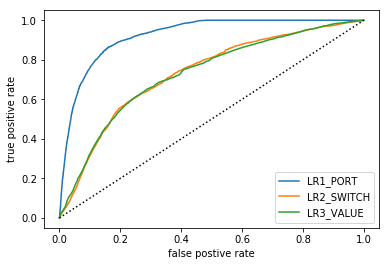

In [199]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, lr1_choice_proba_R[:,1])
plt.plot(fpr, tpr, label="LR1_PORT")

fpr, tpr, _ = roc_curve(y_test, lr2_switch_proba_R[:,1])
plt.plot(fpr, tpr, label="LR2_SWITCH")

fpr, tpr, _ = roc_curve(y_test, lr3_value_proba_R[:,1])
plt.plot(fpr, tpr, label="LR3_VALUE")

plt.plot([0, 1], [0, 1], ':k')
plt.xlabel('false postive rate')
plt.ylabel('true positive rate')

plt.legend(loc='lower right')

### what about a logistic regression with more inputs?

In [19]:
#train on proportion of data up to the 'cutoff.' hold out the rest as test data.
X_train = X_choice_switch[idx_train]
X_test = X_choice_switch[idx_test]

# train and test LR
lr4_multi = LogisticRegression()
lr4_multi.fit(X_train, Y_train_choice)

lr4_multi_proba = lr4_multi.predict_proba(X_test)
lr4_multi_predict = lr4_multi.predict(X_test)

score_lr4_multi_choice = lr4_multi.score(X_test, Y_test_choice)
metrics_lr4_choice = sklearn.metrics.precision_recall_fscore_support(Y_test_choice, lr4_multi_predict)

lr4_switch_predict = np.abs([lr4_multi_predict[n] - X_test[n,8] for n in range(len(lr4_multi_predict))])
metrics_lr4_switch = sklearn.metrics.precision_recall_fscore_support(Y_test_switch, lr4_switch_predict)

score_switch_2 = 1-(np.sum([np.abs(lr4_multi_predict[i] - Y_test_switch[i]) for i in range(len(Y_test_switch))])/(len(Y_test_switch)))

'''
Now train to predict switches
'''

lr5_multi = LogisticRegression()
lr5_multi.fit(X_train, Y_train_switch)

lr5_multi_proba = lr5_multi.predict_proba(X_test)
lr5_multi_predict = lr5_multi.predict(X_test)

score_lr5_multi_switch = lr5_multi.score(X_test, Y_test_switch)
metrics_lr5_switch = sklearn.metrics.precision_recall_fscore_support(Y_test_switch, lr5_multi_predict)


In [20]:
metrics_lr5_switch

(array([ 0.93384401,  0.        ]),
 array([ 0.99983791,  0.        ]),
 array([ 0.96571482,  0.        ]),
 array([30848,  2185]))

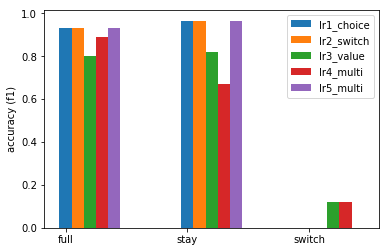

In [21]:
height_a = [score_lr1_choice, metrics_lr1_switch[2][0], metrics_lr1_switch[2][1]]
height_b = [score_lr2_switch, metrics_lr2_switch[2][0], metrics_lr2_switch[2][1]]
height_c = [score_lr3_value_choice, metrics_lr3_switch[2][0], metrics_lr3_switch[2][1]]
height_d = [score_lr4_multi_choice, metrics_lr4_switch[2][0], metrics_lr4_switch[2][1]]
height_e = [score_lr5_multi_switch, metrics_lr5_switch[2][0], metrics_lr5_switch[2][1]]


barWidth = 0.1
# The x position of bars
r1 = np.arange(len(height_b))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]



conditions = ['full', 'stay', 'switch']
plt.bar(r1, height_a, width=barWidth, label='lr1_choice')
plt.bar(r2, height_b, width=barWidth, label='lr2_switch')
plt.bar(r3, height_c, width=barWidth, label='lr3_value')
plt.bar(r4, height_d, width=barWidth, label='lr4_multi')
plt.bar(r5, height_e, width=barWidth, label='lr5_multi')



plt.xticks(range(len(height_b)), conditions)
plt.ylabel('accuracy (f1)')
plt.legend()

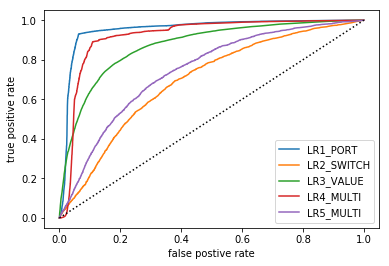

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(Y_test_choice, lr1_choice_proba[:,1])
plt.plot(fpr, tpr, label="LR1_PORT")

fpr, tpr, _ = roc_curve(Y_test_switch, lr2_switch_proba[:,1])
plt.plot(fpr, tpr, label="LR2_SWITCH")

fpr, tpr, _ = roc_curve(Y_test_choice, lr3_value_proba[:,1])
plt.plot(fpr, tpr, label="LR3_VALUE")

fpr, tpr, _ = roc_curve(Y_test_choice, lr4_multi_proba[:,1])
plt.plot(fpr, tpr, label="LR4_MULTI")

fpr, tpr, _ = roc_curve(Y_test_switch, lr5_multi_proba[:,1])
plt.plot(fpr, tpr, label="LR5_MULTI")

plt.plot([0, 1], [0, 1], ':k')
plt.xlabel('false postive rate')
plt.ylabel('true positive rate')

plt.legend(loc='lower right')